<a href="https://colab.research.google.com/github/Ryu4824/code-states/blob/main/n231_discussion_9%EC%A1%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **N231 Interpretable-ML-I**

## 오늘의 목표
- 트리기반 모델의
 MDI를 사용하여 특성의 중요도를 해석할 수 있습니다.
- Permutation Importance를 사용하여 특성의 중요도를 해석할 수 있습니다.

## **개념 Topic**
> 오늘은 다양한 특성 중요도 기법에 대해 배웠습니다.

- 순열중요도를 한 문장으로 요약하여 설명해 보세요. 
  - 주요 키워드를 생각하면서 정리해보세요.
  - 만약 설명이 어렵다면 어느 부분이 이해가 안 되는지 구체적인 질문을 동기들과 나눠보세요.
- **Discussion** 표의 `정리` 탭에 답변을 정리하여 적어 주세요. 

In [ ]:
# 주어진 입력 변수들의 순서를 바꼈을 때, 모델의 성능 변화를 측정하여 각 변수가 모델에 미치는 영향력을 평가하는 방법
# 특성의 변수를 무작위로 배열하여 관련도를 삭제시키고, 기본 데이터와 비교하여 중요도를 계산하는 방법
## 
# 특성의 중요도는 엔지니어가 직접 판단하는 것이 중요하다.

## **코딩 Topic**


In [ ]:
!pip install category_encoders
!pip install xgboost==1.7.2
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 1.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 MB 4.5 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 1.7.4
    Uninstalling xgboost-1.7.4:
      Successfully uninstalled xgboost-1.7.4
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 KB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107747 sha256=ce6996261b81eca47df88d238cc039a2d5ea530a053264223d7bf40fe8b8577a
  Stored in directory: /root/.cache/pip/wheels/7b/26/a5/8460416695a992a2966b41caa5338e5e7fcea98c9d032d055c
Succe

### **Part.1 : 데이터 준비**

중고차 가격 예측 데이터셋인 [100,000 UK Used Car Data set](https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes)을 사용해서 회귀 문제를 풀어보겠습니다. 

> **Data Description**

- company : car manufacturer
- model : car model
- year : registration year
- transmission : type of gearbox
- mileage : distance used
- fuelType : engine fuel
- tax : road tax
- mpg : miles per gallon
- engineSize : size in litres
- price : price in £

#### **1-1. 데이터 불러오기 및 전처리**
- 데이터셋을 불러오고 결측치&중복값을 확인하세요.
  - 결측치와 중복값이 있다면 제거하거나 적절한 값으로 변환시켜보세요.

In [ ]:
# 데이터셋 불러오기 
import pandas as pd
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/renewal/mldl/used_car.csv')
df.head()

,company,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,vauxhall,Corsa,2018,Manual,9876,Petrol,145,55.4,1.4,7885
1,vauxhall,Corsa,2019,Manual,2500,Petrol,145,54.3,1.4,11995
2,vauxhall,Corsa,2017,Automatic,9625,Petrol,145,47.9,1.4,9777
3,vauxhall,Corsa,2016,Manual,25796,Petrol,30,55.4,1.4,8500
4,vauxhall,Corsa,2019,Manual,3887,Petrol,145,43.5,1.4,10000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97712 entries, 0 to 97711
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company       97712 non-null  object 
 1   model         97712 non-null  object 
 2   year          97712 non-null  int64  
 3   transmission  97712 non-null  object 
 4   mileage       97712 non-null  int64  
 5   fuelType      97712 non-null  object 
 6   tax           97712 non-null  int64  
 7   mpg           97712 non-null  float64
 8   engineSize    97712 non-null  float64
 9   price         97712 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 7.5+ MB


In [ ]:
# !pip install pandas-profiling

In [ ]:
# from pandas_profiling import ProfileReport
# profile = ProfileReport(df, explorative=True)
# profile.to_file(output_file='n231 discussion')

In [ ]:
df[df.year > 2023]

,company,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
73651,ford,Fiesta,2060,Automatic,54807,Petrol,205,42.8,1.4,6495


In [ ]:
df.year = df.year.replace({2060:2016})
df[df.year >2023]

,company,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price


#### **1-2. 데이터셋 분리**
- 특성 X와 타겟 y를 지정하세요.
  - 타겟은 `price`입니다. 
- X와 y 모두 train/test set으로 분리하세요.
  - train/test set을 적절한 비율로 나누세요.
  - `random_state`로 시드를 고정하세요.
- X와 y 모두 train set을 train/validation set으로 분리하세요. 
  - train/val set을 적절한 비율로 나누세요.
  - `random_state`로 시드를 고정하세요.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import eli5

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder, TargetEncoder, OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, classification_report
from eli5.sklearn import PermutationImportance
from xgboost import XGBRegressor

In [ ]:
target = 'price'
y = df[target]
X = df.drop(target, axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=42)
print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(54963, 9) (18321, 9) (24428, 9)
(54963,) (18321,) (24428,)


### **Part.2 : 모델 학습 및 예측**

#### **2-1. 기준모델 설정**
- 중고차의 가격을 예측하는 모델이기 때문에 회귀문제에 해당됩니다.
- 학습 데이터의 타겟의 평균값을 활용하여 기준모델을 만드세요.
  - 기준모델의 평가지표로는 MAE를 사용합니다.

In [ ]:
y_mean = y_train.mean()

y_pred = [y_mean] * len(y_val)

# MAE 계산하기
mae_baseline = mean_absolute_error(y_val, y_pred)

print('기준모델 MAE', mae_baseline)

기준모델 MAE 7012.625098528678


#### **2-2. 회귀 모델링**
- 트리기반 모델에서는 스케일링이 성능에 영향을 주지않으므로 선형회귀 기반 모델보다 전처리 과정이 수월했습니다.
- 여러 가지 회귀모델이 있지만 시간 관계상 선형회귀 기반 모델에 비해 전처리가 많이 필요하지 않은 `RandomForestRegressor`와 `XGBoostRegressor` 모델을 사용합니다.
  - `RandomForestRegressor`를 사용하여 검증 데이터에서의 MAE가 기준모델보다 낮은 모델을 만들어보세요.
  - `XGBoostRegressor`를 사용하여 검증 데이터에서의 MAE가 기준모델보다 낮은 모델을 만들어보세요.
  - **오늘은 모델의 성능보다 모델 해석에 중점을 두고 학습할 것이기 때문에 두 모델의 성능을 매우 좋게 만들 필요는 없습니다!**
    - 기준모델보다 좋은 성능을 내면서 과적합이 발생하지 않을 정도로만 만들어보세요. 

In [ ]:
#범주형, 수치형 분리
cat_cols = X_train.select_dtypes(include='object').columns.tolist()
num_cols = X_train.drop(cat_cols, axis=1).columns.tolist()

#스케일러는 파이프라인적용 안됨
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_val[num_cols] = scaler.transform(X_val[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

#모델생성
pipe_rf = make_pipeline(TargetEncoder(cols=cat_cols),RandomForestRegressor(random_state=42, n_jobs=-1, oob_score=True))
pipe_xgb = make_pipeline(TargetEncoder(cols=cat_cols),XGBRegressor(random_state=42, n_jobs=-1))
#모델학습
pipe_rf.fit(X_train,y_train)
pipe_xgb.fit(X_train,y_train)
#예측값
y_val_pred_rf = pipe_rf.predict(X_val)
y_val_pred_xgb = pipe_xgb.predict(X_val)
#평가점수
mae_rf = mean_absolute_error(y_val, y_val_pred_rf)
mae_xgb = mean_absolute_error(y_val, y_val_pred_xgb)
print('rf MAE 점수', mae_rf)
print('rf MAE 점수', mae_xgb)

rf MAE 점수 1188.150044116218
rf MAE 점수 1243.4826545938122


### **Part.3 : 특성 중요도 해석**

#### **3-1. MDI(Mean Decreased Impurity)**
- MDI를 사용하여 특성의 중요도를 해석해봅시다.

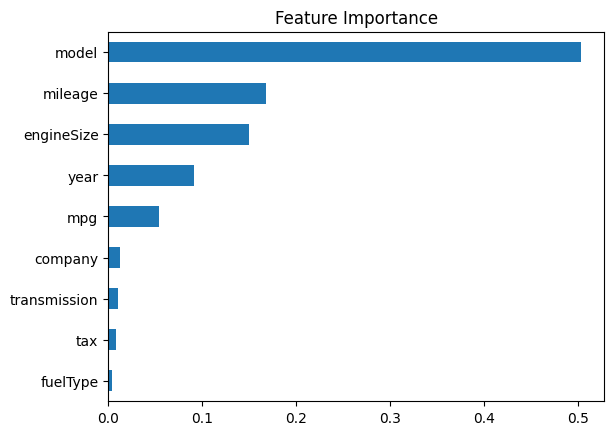

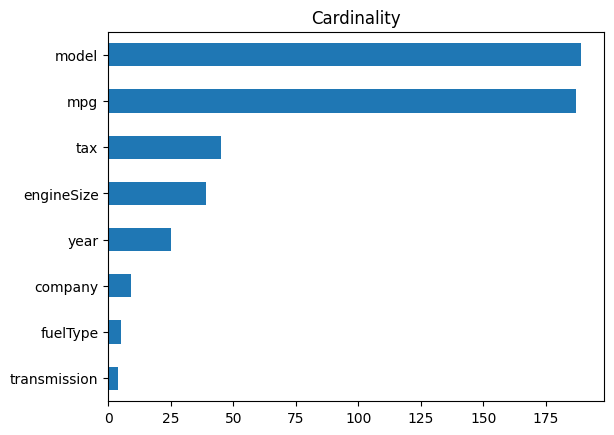

In [ ]:
# 특성 중요도

rf = pipe_rf.named_steps["randomforestregressor"]
importances = pd.Series(rf.feature_importances_, X_train.columns)

importances.sort_values().plot.barh()
plt.title("Feature Importance")
plt.show()

X_train.drop('mileage', axis=1).nunique().sort_values().plot.barh()
plt.title("Cardinality")
plt.show()

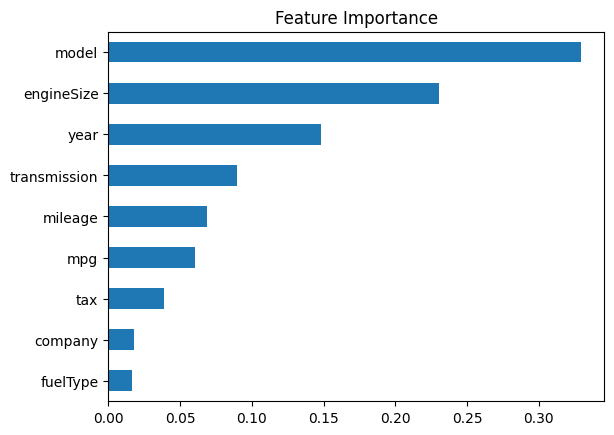

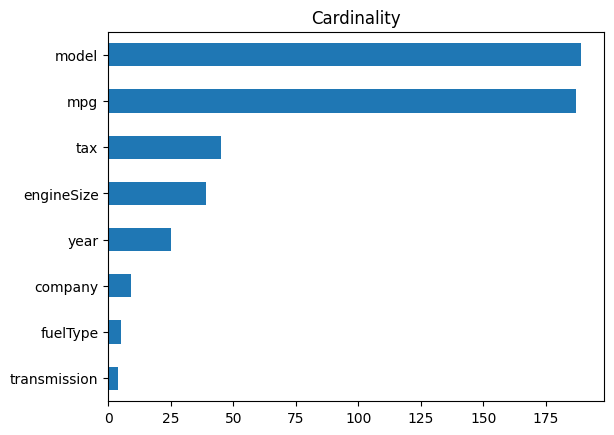

In [ ]:
# 특성 중요도
xgb = pipe_xgb.named_steps["xgbregressor"]
importances = pd.Series(xgb.feature_importances_, X_train.columns)

importances.sort_values().plot.barh()
plt.title("Feature Importance")
plt.show()

X_train.drop('mileage', axis=1).nunique().sort_values().plot.barh()
plt.title("Cardinality")
plt.show()

##### **RandomForest의 MDI**
- RandomForest 모델의 MDI를 출력해보세요.
  - 가장 중요한 특성과 가장 중요하지 않은 특성은 어떤 특성인가요?
  - 해당 특성이 왜 중요하거나 중요하지 않은지 추측해보고 추측한 내용을 기록해주세요.
  
  ```
  1. 중요한 특성: model, enginesize, mileage, year
  - 중요한 이유: Feature importance에서 상위 3위의 특성들이고, 서로 타겟과의 연관이 있다고 여길 수 있기 때문이다. 
  model, enginesize와는 자동차 자체의 성능에 대해서 연관이 깊은 특성이며, mileage, year는 중고차의 연식을 나타내는 지표기에 중요하다고 생각된다.

  model : 자동차의 종류에따라 가격 변동이 심해진다.
  mileage :  주행거리가 길면 가격이 저렴해진다.
  engineSize : 모델(차종)과의 상관계수가 높다.

  2. 중요하지 않은 특성: transmission, tax, fuelType
  - 중요하지 않은 이유: 이미 어떤 모델, 연식 등 이미 정해진 상황에서 이 3개는 전혀 고려하지 않아도 되기 때문에 중요하지 않은 특성이 된다. 
  transmission을 굳이 따져가면서 사는 사람은 극히 드물기도 하고, tax나 fuelType 역시 그 특성만으로 차의 전체 부분을 알 수 없기 때문이다.

  transmission : 중고차를 구입할 때, 굳이 자동과 수동을 고려하지 않는다. 심지어 요즘은 Auto으로만 만드는 경우가 많기에 고려하지 않는 것 같다.
  tax : 자동차세를 걱정하고 중고차를 구매하진 않는다.
  fuelType : model과 enginesize에 따라 나뉘는 특성일 뿐이지, 거기서 연료까지 고려하는 사람들은 드물다.
  ```

##### **XGBoost의 MDI**
- XGBoost 모델의 MDI를 출력해보세요.
  - 가장 중요한 특성과 가장 중요하지 않은 특성은 어떤 특성인가요?
  - RandomForest 모델과 중요한 특성/중요하지 않은 특성이 같나요?
  - 해당 특성이 왜 중요하거나 중요하지 않은지 추측해보고 추측한 내용을 기록해주세요.
 
  ```
  RandomForest 모델과 같은 특성이 있다면 해당 특성은 생략해도 좋습니다.
  1. 중요한 특성: model, enginesize, year
  - 중요한 이유: RandomForest와 비슷하게 model, enginesize와는 자동차 자체의 성능에 대해서 연관이 깊은 특성이며, mileage, year는 중고차의 연식을 나타내는 지표인 것은 동일했다.
 뜻밖에도 transmission이 RandomForest에서는 그다지 중요하지 않게 여겼던 것에 비해서 순위가 많이 올라갔다. 
 transmission은 어느정도 Model과 year에 종속되어있기 때문에 그럴 수도 있겠다는 생각을 했다.

  2. 중요하지 않은 특성: tax, company, fuelType 
  - 중요하지 않은 이유: 이 역시나 이 3개의 지표만으로 해당 중고차의 전체 지표와 동일 할 수가 없다고 여길 수밖에 없다.



  ```


#### **3-2. 순열중요도(Permutation Importance)**
- 순열중요도를 사용하여 특성의 중요도를 해석해봅시다.
- 순열중요도를 사용했을 때 모델을 재학습 시켰나요?
 - 재학습 시켰다면 어떤 방법으로 재학습시켰는지, 재학습 시키지 않았다면 왜 시키지 않아도 되는지 논의해보세요.

Text(0.5, 1.0, 'Permutation Importance')

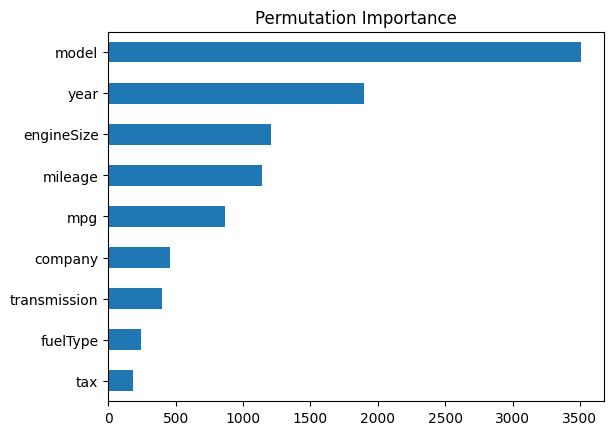

In [ ]:
# permuter 정의
permuter = PermutationImportance(pipe_xgb.named_steps["xgbregressor"],  # model
                                 scoring="neg_mean_absolute_error",  # metric
                                 n_iter=10,  # 다른 random seed를 사용하여 10번 반복
                                 random_state=42)

# 스코어를 다시 계산합니다.
X_test_preprocessed = pipe_xgb[0].transform(X_test)
permuter.fit(X_test_preprocessed, y_test)

feature_importances = pd.Series(permuter.feature_importances_, X_test.columns)
features = feature_importances.sort_values(ascending=False).index

feature_names = X_test.columns.tolist()
pi = pd.Series(permuter.feature_importances_, feature_names).sort_values()
pi.plot.barh()
plt.title("Permutation Importance")

In [ ]:
# 특성별 score을 확인합니다.
eli5.show_weights(
    permuter,
    top=None,  # top n 지정 가능, None 일 경우 모든 특성
    feature_names=feature_names) # list 형식으로 넣어야 합니다

Weight,Feature
3505.0487 ± 45.2226,model
1900.5668 ± 26.5282,year
1205.5930 ± 29.3478,engineSize
1143.7134 ± 20.9380,mileage
866.8015 ± 14.9227,mpg
457.2398 ± 17.3472,company
400.3815 ± 15.8360,transmission
240.3405 ± 10.4771,fuelType
182.5707 ± 9.3972,tax


Text(0.5, 1.0, 'Permutation Importance')

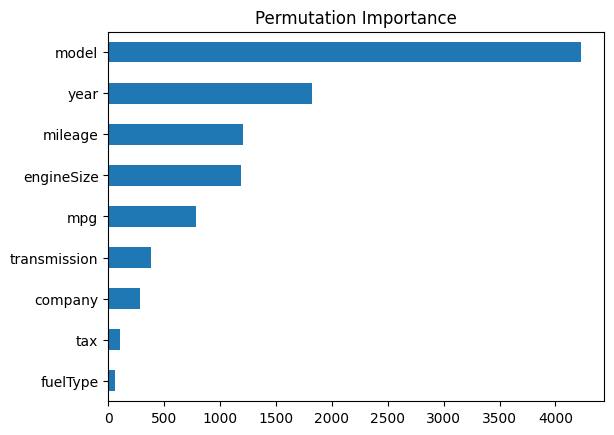

In [ ]:
# permuter 정의
permuter = PermutationImportance(pipe_rf.named_steps["randomforestregressor"],  # model
                                 scoring="neg_mean_absolute_error",  # metric
                                 n_iter=10,  # 다른 random seed를 사용하여 10번 반복
                                 random_state=42)

# 스코어를 다시 계산합니다.
X_test_preprocessed = pipe_rf[0].transform(X_test)
permuter.fit(X_test_preprocessed, y_test)

feature_importances = pd.Series(permuter.feature_importances_, X_test.columns)
features = feature_importances.sort_values(ascending=False).index

feature_names = X_test.columns.tolist()
pi = pd.Series(permuter.feature_importances_, feature_names).sort_values()
pi.plot.barh()
plt.title("Permutation Importance")

In [ ]:
# 특성별 score을 확인합니다.
eli5.show_weights(
    permuter,
    top=None,  # top n 지정 가능, None 일 경우 모든 특성
    feature_names=feature_names) # list 형식으로 넣어야 합니다

Weight,Feature
4225.4676 ± 48.9001,model
1822.9798 ± 20.5179,year
1209.7856 ± 22.0049,mileage
1187.0073 ± 23.3392,engineSize
781.0140 ± 15.5958,mpg
381.8086 ± 10.3179,transmission
282.0113 ± 9.5151,company
105.7087 ± 4.5683,tax
57.9708 ± 4.0752,fuelType


##### **RandomForest의 순열 중요도**
- RandomForest 모델의 순열중요도를 출력해보세요.
  - 가장 중요한 특성과 가장 중요하지 않은 특성은 어떤 특성인가요?
  - RandomForest 모델의 MDI를 사용했을 때와 중요한/중요하지않은 특성이 같나요?
  - 해당 특성이 왜 중요하거나 중요하지 않은지 추측해보고 추측한 내용을 기록해주세요.
  
  ```
  이미 추측해본 특성이라면 생략해도 좋습니다.

  1. 중요한 특성:
  - 중요한 이유:

  2. 중요하지 않은 특성:
  - 중요하지 않은 이유:
  ```

In [ ]:
# 위에 이미, 추측했듯 나왔지만, 

##### **XGBoost의 순열 중요도**
- XGBoost 모델의 순열중요도를 출력해보세요.
  - 가장 중요한 특성과 가장 중요하지 않은 특성은 어떤 특성인가요?
  - XGBoost 모델의 MDI를 사용했을 때와 중요한/중요하지않은 특성이 같나요?
  - RandomForest 모델의 순열중요도를 사용했을 때와 중요한/중요하지 않은 특성이 같나요?
  - 해당 특성이 왜 중요하거나 중요하지 않은지 추측해보고 추측한 내용을 기록해주세요.
  
  ```
  이미 추측해본 특성이라면 생략해도 좋습니다.

  1. 중요한 특성:
  - 중요한 이유:

  2. 중요하지 않은 특성:
  - 중요하지 않은 이유:
  ```

### **Conclusion**
> 오늘 Topic을 수행한 결과를 바탕으로, 다음 사항에 대해 답해 주세요.

1. 위에서 작성한 중요한 특성/중요하지 않은 특성의 셀을 기반으로 정리해 보세요.
  - RandomForest 모델의 MDI에서 중요한 특성, 중요하지 않은 특성과 그 이유는 무엇인가요?
  - XGBoost 모델의 MDI에서 중요한 특성, 중요하지 않은 특성과 그 이유는 무엇인가요?
  - RandomForest 모델의 순열중요도에서 중요한 특성, 중요하지 않은 특성과 그 이유는 무엇인가요?
  - XGBoost 모델의 순열중요도에서 중요한 특성, 중요하지 않은 특성과 그 이유는 무엇인가요?
2. 특성의 중요도를 파악하고 다른 모델들과 비교해본 후에 어떠한 시도를 추가적으로 해볼 수 있을까요?
- **Discussion** 표의 `정리` 탭에 답변을 정리하여 적어 주세요. 

---
2. 답변

특성을 조합하거나 제거해서 성능을 올릴 수는 있지만, 정확한 판단을 위해서라면 해당 데이터에 대해서 높은 데이터 이해도가 더 유리하다.

데이터가 주어졌다면 그 데이터에 대한 높은 이해도가 있어야지만 알 수 있는 부분이 많았다. 당장 게임이나 자동차, 농구에 대해서 데이터를 주었는데 그 값이 합당한 값인지 알 수 있는 건 높은 데이터 이해도를 가진 엔지니어밖에 없다.

---

## **심화 Topic**
- MDI, Drop Column Importance의 한계점은 무엇인가요?
- 순열중요도는 MDI, Drop Column Importance의 한계점을 어떻게 해결하나요? 
  - shuffle의 역할을 생각해 보세요.